# Analysis - exp13 and 14

Repeats of stumbler (13) and stumbler-strategist (14) exps, with optimal parameters.

In [1]:
import os
import csv
import numpy as np
#import torch as th

from glob import glob
from pprint import pprint

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from notebook_helpers import load_monitored
from notebook_helpers import join_monitored
from notebook_helpers import score_summary

# Find the files
## Exp 13

In [2]:
path = "/Users/Jack/Desktop/PNC/CoAx/azad-next-move/data/wythoff/exp13/"
#results_path = "/Users/type/Code/azad/data/wythoff/"

files = sorted(glob(os.path.join(path, "run_*_monitor.csv")))
files[:10]

exp_13 = []
for fi in files:
    mon = load_monitored(fi)
    exp_13.append(mon)

## Exp 14

In [3]:
path = "/Users/Jack/Desktop/PNC/CoAx/azad-next-move/data/wythoff/exp14/"

exp_14 = []
runs = range(1, 201)
for r in runs:
    files = sorted(glob(os.path.join(path, 
        "run_{}_episode*_stumbler*.csv".format(int(r)))))
    
    mon = join_monitored(files, sort_key='episode')
    exp_14.append(mon)

In [4]:
path = "/Users/Jack/Desktop/PNC/CoAx/azad-next-move/data/wythoff/exp14_replay/"

exp_14_replay = []
runs = range(1, 201)
for r in runs:
    files = sorted(glob(os.path.join(path, 
        "run_{}_episode*_stumbler*.csv".format(int(r)))))
    
    mon = join_monitored(files, sort_key='episode')
    exp_14_replay.append(mon)

# Main simulation plot

/var/folders/kg/g1dd54k55952tgw_kmcj8wqr0000gn/T/ipykernel_22442/1395354235.py:25: RuntimeWarning: divide by zero encountered in divide
  _ = ax1.plot(episode_14,        exp_14_avg        / episode_14,        color='purple', alpha=0.7, linewidth=3, label="imagination-strategist")
/var/folders/kg/g1dd54k55952tgw_kmcj8wqr0000gn/T/ipykernel_22442/1395354235.py:26: RuntimeWarning: divide by zero encountered in divide
  _ = ax1.plot(episode_14_replay, exp_14_replay_avg / episode_14_replay, color='orange', alpha=0.7, linewidth=3, label="replay-strategist", linestyle="--")
/var/folders/kg/g1dd54k55952tgw_kmcj8wqr0000gn/T/ipykernel_22442/1395354235.py:27: RuntimeWarning: divide by zero encountered in divide
  _ = ax1.plot(episode_13,        exp_13_avg        / episode_13,        color='grey',   alpha=0.7, linewidth=3, label="stumbler alone", linestyle="-")
/var/folders/kg/g1dd54k55952tgw_kmcj8wqr0000gn/T/ipykernel_22442/1395354235.py:54: RuntimeWarning: divide by zero encountered in divide
  _

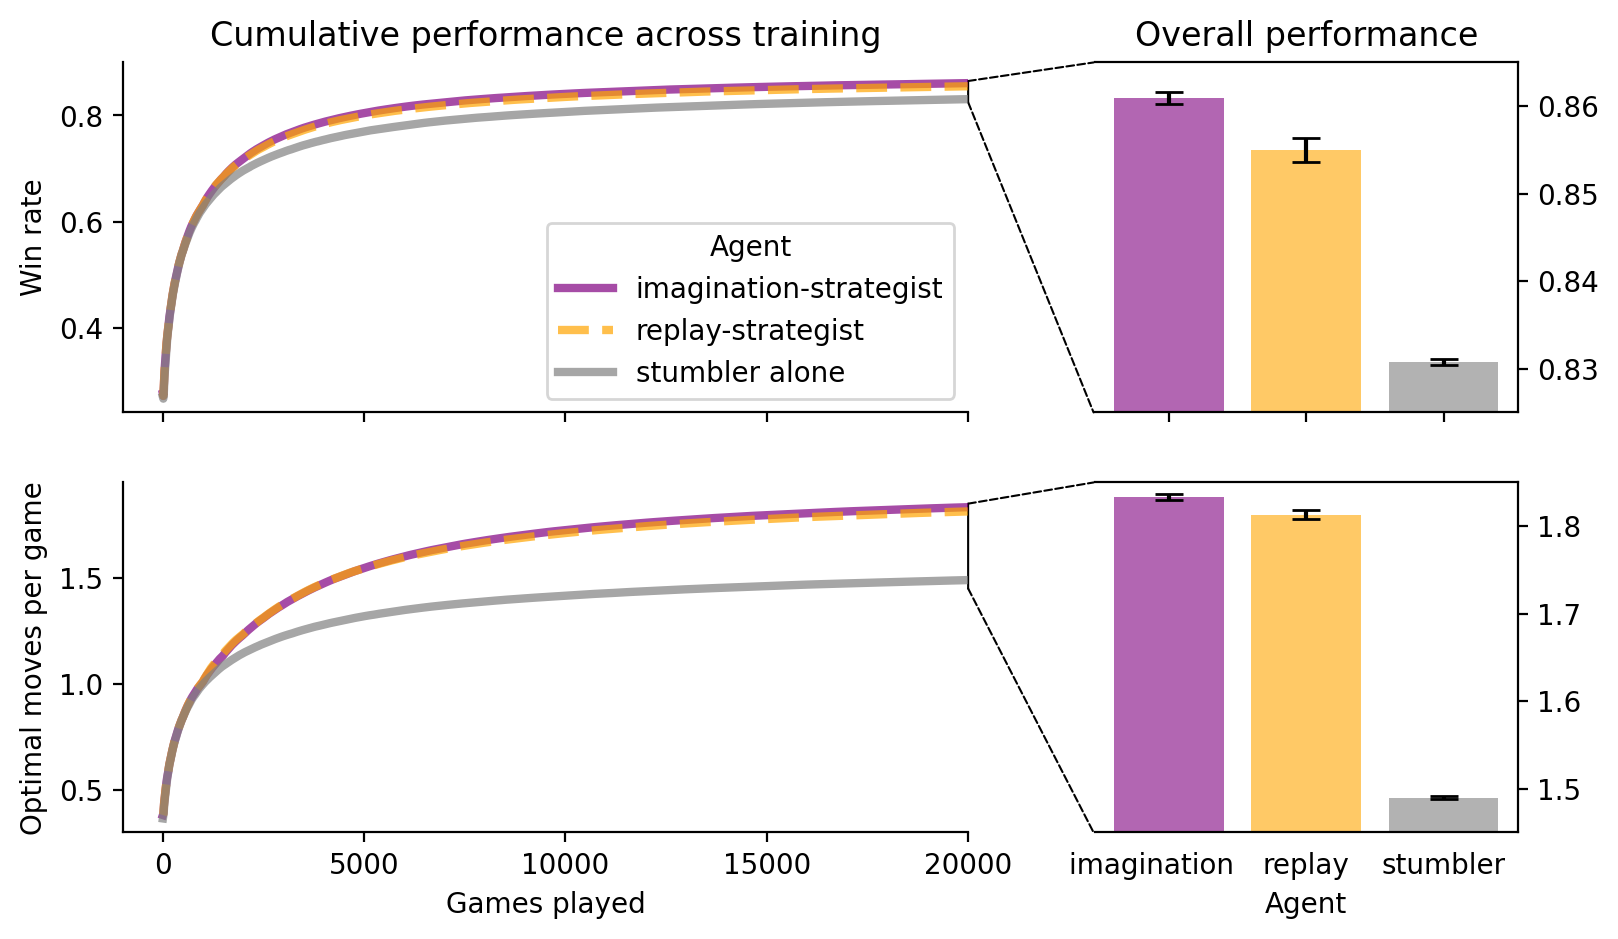

In [255]:
from matplotlib.patches import ConnectionPatch

# Create a figure and a gridspec
fig = plt.figure(figsize=(9, 5))
gs = fig.add_gridspec(2, 2, width_ratios=[2, 1], height_ratios=[1, 1])
fig.tight_layout()

# Create subplots using the gridspec
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
for ax in [ax1, ax3]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
for ax in [ax2, ax4]:
    ax.spines['left'].set_visible(False)
    ax.yaxis.tick_right()

# Summarize data from games won
episode_14,        exp_14_avg,        exp_14_SE        = score_summary(exp_14,        key="total_wins")
episode_14_replay, exp_14_replay_avg, exp_14_replay_SE = score_summary(exp_14_replay, key="total_wins")
episode_13,        exp_13_avg,        exp_13_SE        = score_summary(exp_13,        key="total_wins")

_ = ax1.plot(episode_14,        exp_14_avg        / episode_14,        color='purple', alpha=0.7, linewidth=3, label="imagination-strategist")
_ = ax1.plot(episode_14_replay, exp_14_replay_avg / episode_14_replay, color='orange', alpha=0.7, linewidth=3, label="replay-strategist", linestyle="--")
_ = ax1.plot(episode_13,        exp_13_avg        / episode_13,        color='grey',   alpha=0.7, linewidth=3, label="stumbler alone", linestyle="-")
_ = ax1.legend(title='Agent')
_ = ax1.set_ylabel("Win rate")
_ = ax1.set_ylim(0.24, 0.9)
_ = ax1.set_xlim(right=20000)
_ = ax1.set_xticks(np.arange(0, 20001, 5000))
_ = ax1.xaxis.set_ticklabels([])
_ = ax1.set_title('Cumulative performance across training')

_ = ax2.bar(range(3), [exp_14_avg[-1]        / max(episode_14),
                       exp_14_replay_avg[-1] / max(episode_14_replay),
                       exp_13_avg[-1]        / max(episode_13)],
            yerr =    [exp_14_SE[-1]        / max(episode_14),
                       exp_14_replay_SE[-1] / max(episode_14_replay),
                       exp_13_SE[-1]        / max(episode_13)],
            color = ["purple", "orange", "gray"],
            alpha = 0.6,
            capsize = 5)
_ = ax2.set_ylim(0.825, 0.865)
_ = ax2.xaxis.set_ticklabels([])
_ = ax2.set_title('Overall performance')

# Summarize data from optimal moves
episode_14,        exp_14_avg,        exp_14_SE        = score_summary(exp_14,        key="total_op_moves")
episode_14_replay, exp_14_replay_avg, exp_14_replay_SE = score_summary(exp_14_replay, key="total_op_moves")
episode_13,        exp_13_avg,        exp_13_SE        = score_summary(exp_13,        key="total_op_moves")

_ = ax3.plot(episode_14,        exp_14_avg        / episode_14,        color='purple', alpha=0.7, linewidth=3, label="imagination-strategist")
_ = ax3.plot(episode_14_replay, exp_14_replay_avg / episode_14_replay, color='orange', alpha=0.7, linewidth=3, label="replay-strategist", linestyle="--")
_ = ax3.plot(episode_13,        exp_13_avg        / episode_13,        color='grey',   alpha=0.7, linewidth=3, label="stumbler alone", linestyle="-")
_ = ax3.set_xlabel("Games played")
_ = ax3.set_ylabel("Optimal moves per game")
_ = ax3.set_ylim(0.3, 1.95)
_ = ax3.set_xlim(right=20000)
_ = ax3.set_xticks(np.arange(0, 20001, 5000))

_ = ax4.bar(range(3), [exp_14_avg[-1]        / episode_14[-1],
                       exp_14_replay_avg[-1] / episode_14_replay[-1],
                       exp_13_avg[-1]        / episode_13[-1]],
            yerr =    [exp_14_SE[-1]        / episode_14[-1],
                       exp_14_replay_SE[-1] / episode_14_replay[-1], 
                       exp_13_SE[-1]        / episode_13[-1] ],
            alpha = 0.6,
            color = ["purple", "orange", "gray"],
            capsize = 5)
_ = ax4.set_xlabel("Agent")
_ = ax4.xaxis.set_ticklabels(['', 'imagination    ', 'replay', 'stumbler'])
_ = ax4.tick_params(bottom=False)
_ = ax4.set_ylim(1.45, 1.85)

#
con1 = ConnectionPatch(xyA=(20000, 0.865), coordsA=ax1.transData,
                       xyB=(20000, 0.825), coordsB=ax1.transData, linestyle="-")
con2 = ConnectionPatch(xyA=(20000, 0.865), coordsA=ax1.transData,
                       xyB=(-0.55, 0.865), coordsB=ax2.transData, linestyle='--')
con3 = ConnectionPatch(xyA=(20000, 0.825), coordsA=ax1.transData,
                       xyB=(-0.55, 0.825), coordsB=ax2.transData, linestyle="--")
con4 = ConnectionPatch(xyA=(20000, 1.85), coordsA=ax3.transData,
                       xyB=(20000, 1.45), coordsB=ax3.transData, linestyle="-")
con5 = ConnectionPatch(xyA=(20000, 1.85), coordsA=ax3.transData,
                       xyB=(-0.55, 1.85), coordsB=ax4.transData, linestyle='--')
con6 = ConnectionPatch(xyA=(20000, 1.45), coordsA=ax3.transData,
                       xyB=(-0.55, 1.45), coordsB=ax4.transData, linestyle="--")

for con in [con1, con2, con3]:
    ax1.add_artist(con)
    con.set_linewidth(0.75)
for con in [con4, con5, con6]:
    ax3.add_artist(con)
    con.set_linewidth(0.75)

plt.savefig('sims_summary.png', dpi=400)
plt.savefig('sims_summary.svg')

plt.show()

In [5]:
# path = "/Users/Jack/Desktop/PNC/CoAx/azad-next-move/data/wythoff/exp14_perfect_replay/"

# exp_14_perfect_replay = []
# runs = range(1, 101)
# for r in runs:
#     files = sorted(glob(os.path.join(path, 
#         "run_{}_episode*_stumbler*.csv".format(int(r)))))
    
#     mon = join_monitored(files, sort_key='episode')
#     exp_14_perfect_replay.append(mon)

In [6]:
pprint(exp_13[0].keys())
pprint(exp_14[0].keys())
pprint(exp_14_replay[0].keys())
# pprint(exp_14_perfect_replay[0].keys())

dict_keys(['file', 'episode', 'loss', 'score', 'total_losses', 'total_moves', 'total_op_move_opportunities', 'total_op_moves', 'total_reward', 'total_wins'])
dict_keys(['file', 'episode', 'loss', 'score', 'total_losses', 'total_moves', 'total_op_move_opportunities', 'total_op_moves', 'total_reward', 'total_wins'])
dict_keys(['file', 'episode', 'loss', 'score', 'total_losses', 'total_moves', 'total_op_move_opportunities', 'total_op_moves', 'total_reward', 'total_wins'])


In [7]:
print(np.max([np.max(mon['score'][-100:-1]) for mon in exp_13]))
print(np.max([np.max(mon['score'][-100:-1]) for mon in exp_14]))
print(np.max([np.max(mon['score'][-100:-1]) for mon in exp_14_replay]))

0.7799647698552545
0.9470139771283402
0.9494524221236563


# Plots

## Optimal play

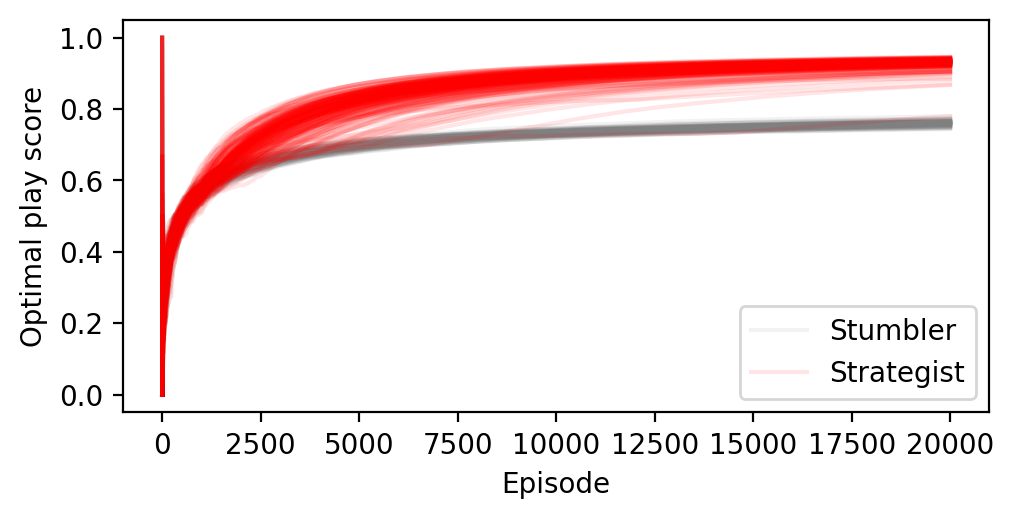

In [8]:
plt.figure(figsize=(5, 2.5))

for n, mon in enumerate(exp_13):
    # Only want one legend entry
    lab = None
    if n == 0:
        lab = "Stumbler"
        
    # Plot
    _ = plt.plot(mon['episode'], mon['score'], 
                    color='grey', alpha=.1,  label=lab)

for n, mon in enumerate(exp_14):
    # Only want one legend entry
    lab = None
    if n == 0:
        lab = "Strategist"
    
    # Plot
    _ = plt.plot(mon['episode'], mon['score'], 
                    color='red', alpha=.1, label=lab)

_ = plt.tight_layout()
_ = plt.legend()
_ = plt.xlabel("Episode")
_ = plt.ylabel("Optimal play score")

In [9]:
episode_13,        exp_13_avg,        exp_13_SE        = score_summary(exp_13)
episode_14,        exp_14_avg,        exp_14_SE        = score_summary(exp_14)
episode_14_replay, exp_14_replay_avg, exp_14_replay_SE = score_summary(exp_14_replay)

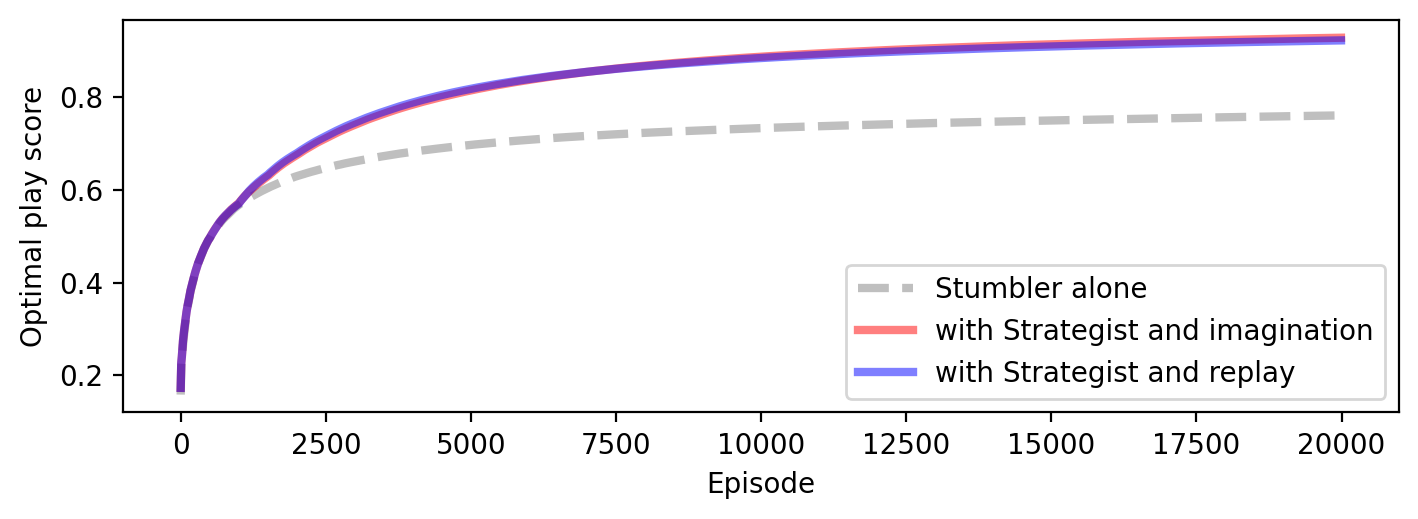

In [10]:
plt.figure(figsize=(7, 2.5))
_ = plt.plot(episode_13, exp_13_avg, linestyle="--", color='grey', alpha=.5, linewidth=3, label="Stumbler alone")
_ = plt.plot(episode_14, exp_14_avg, color='red', alpha=.5, linewidth=3, label="with Strategist and imagination")
_ = plt.plot(episode_14_replay, exp_14_replay_avg, color='blue', alpha=.5, linewidth=3, label="with Strategist and replay")
_ = plt.tight_layout()
_ = plt.legend()
_ = plt.xlabel("Episode")
_ = plt.ylabel("Optimal play score")


F_onewayResult(statistic=2640.0679610253474, pvalue=1.815453326843299e-265)

img vs rep: Ttest_indResult(statistic=2.550528971728686, pvalue=0.011129528071333716)
img vs ctl: Ttest_indResult(statistic=97.3856132879026, pvalue=5.700624286419513e-228)
rep vs ctl: Ttest_indResult(statistic=58.85387070174799, pvalue=4.0448758903721115e-166)



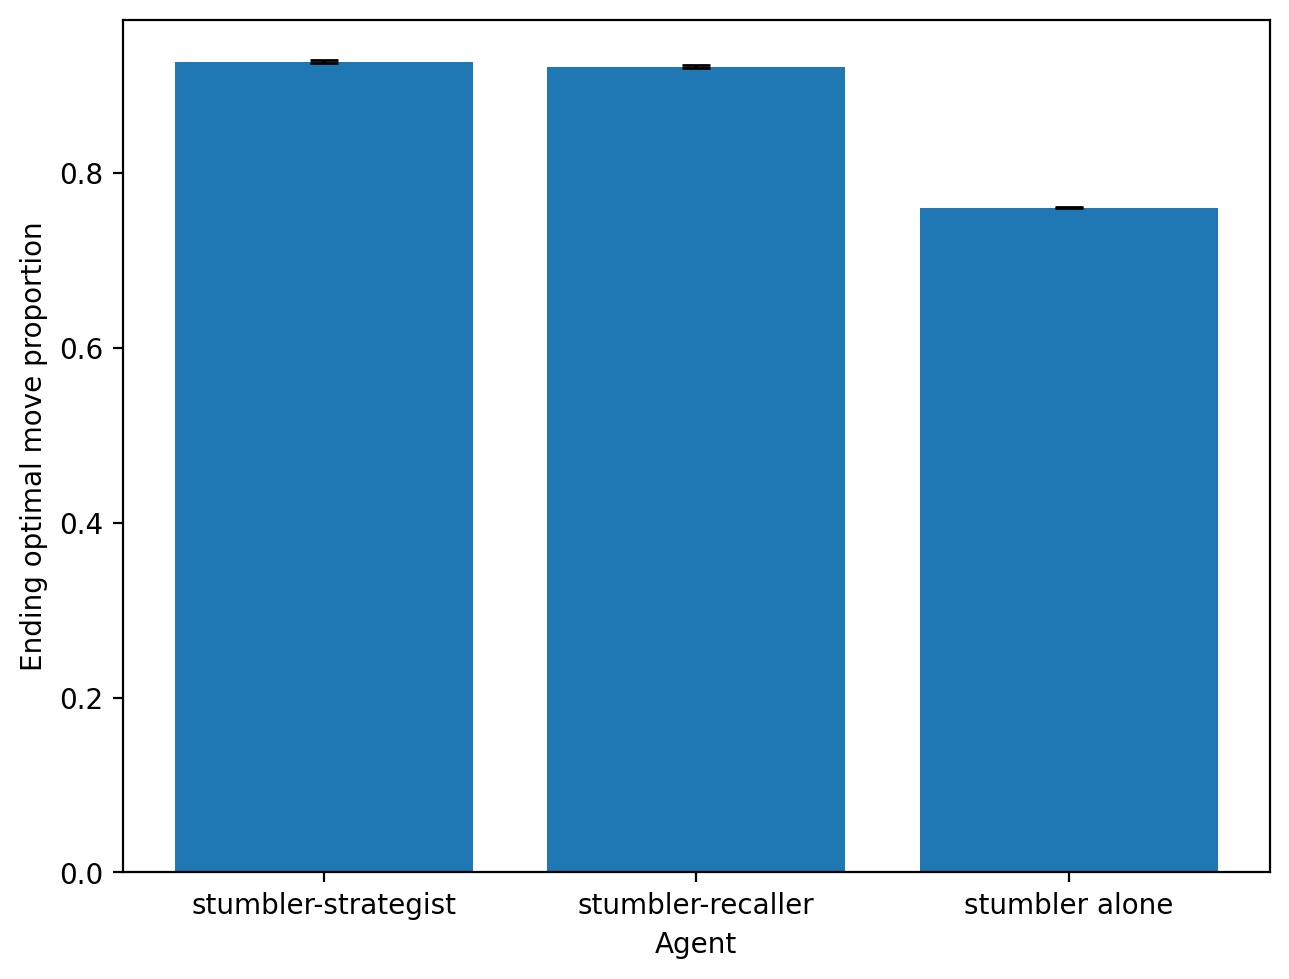

In [11]:
img = [mon['score'][-1] for mon in exp_14]
rep = [mon['score'][-1] for mon in exp_14_replay]
ctl = [mon['score'][-1] for mon in exp_13]

from scipy import stats

plt.figure()

plt.bar(range(3), [exp_14_avg[-1], exp_14_replay_avg[-1], exp_13_avg[-1]],
             yerr=[exp_14_SE[-1],  exp_14_replay_SE[-1],  exp_13_SE[-1] ], capsize=5)

_ = plt.tight_layout()
# _ = plt.ylim(0, 1)
_ = plt.xlabel("Agent")
_ = plt.ylabel("Ending optimal move proportion")
_ = plt.xticks(range(3), labels = ["stumbler-strategist", "stumbler-recaller", "stumbler alone"])

print()
print(stats.f_oneway(img, rep, ctl))
print()
print('img vs rep: ' + str(stats.ttest_ind(img, rep)))
print('img vs ctl: ' + str(stats.ttest_ind(img, ctl)))
print('rep vs ctl: ' + str(stats.ttest_ind(rep, ctl)))
print()

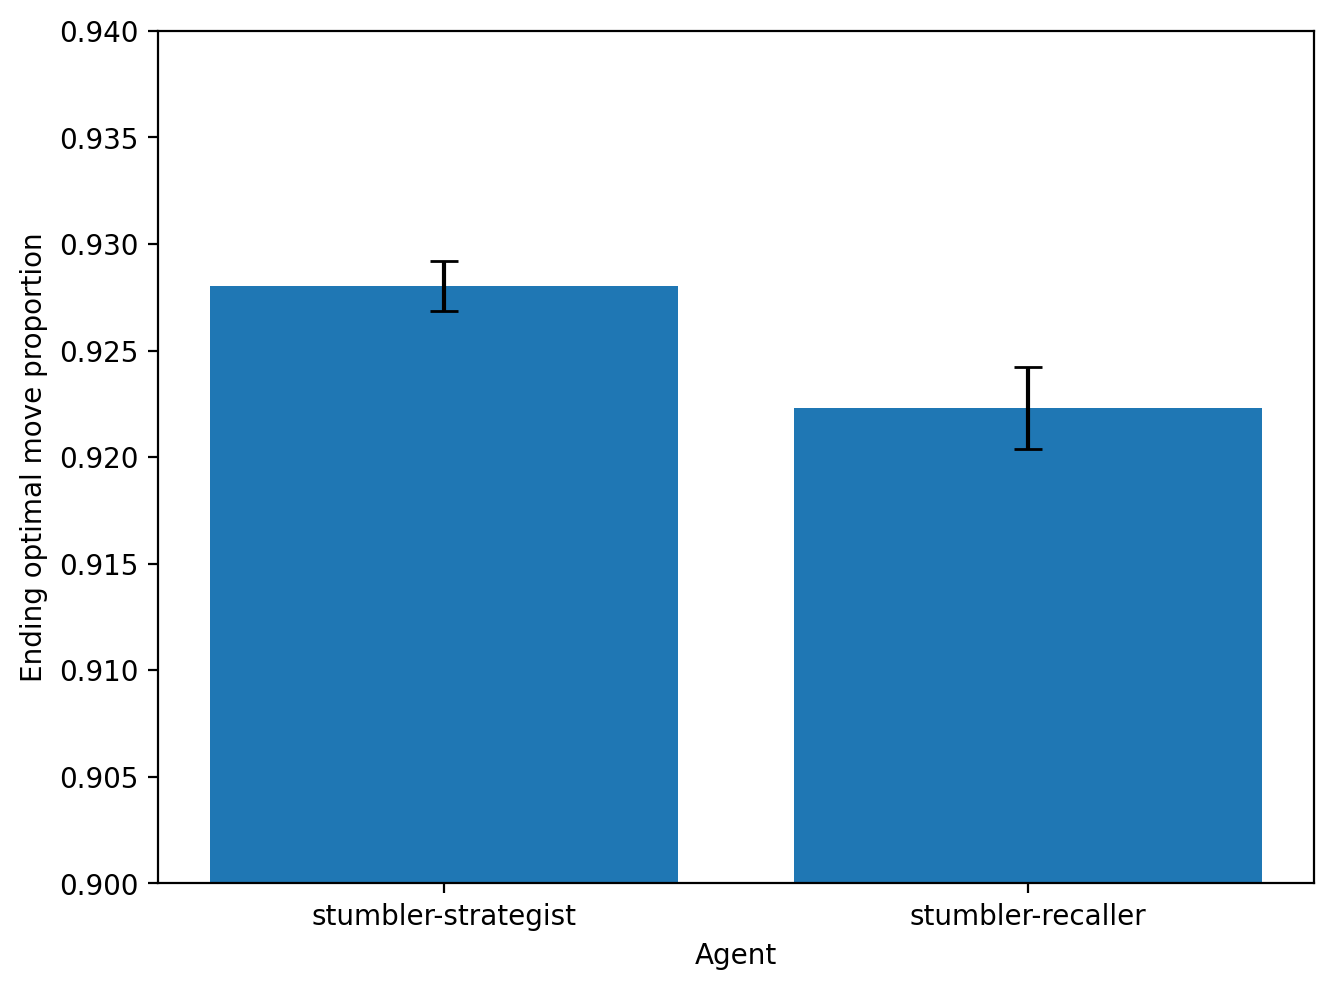

In [12]:
plt.figure()

plt.bar(range(2), [exp_14_avg[-1], exp_14_replay_avg[-1]],
             yerr=[exp_14_SE[-1],  exp_14_replay_SE[-1] ], capsize=5)

_ = plt.tight_layout()
_ = plt.ylim(0.90, 0.94)
_ = plt.xlabel("Agent")
_ = plt.ylabel("Ending optimal move proportion")
_ = plt.xticks(range(2), labels = ["stumbler-strategist", "stumbler-recaller"])

In [13]:
episode_13,        exp_13_avg,        exp_13_SE        = score_summary(exp_13,        key="total_op_moves")
episode_14,        exp_14_avg,        exp_14_SE        = score_summary(exp_14,        key="total_op_moves")
episode_14_replay, exp_14_replay_avg, exp_14_replay_SE = score_summary(exp_14_replay, key="total_op_moves")

/var/folders/kg/g1dd54k55952tgw_kmcj8wqr0000gn/T/ipykernel_22442/1056857780.py:2: RuntimeWarning: divide by zero encountered in divide
  _ = plt.plot(episode_13, exp_13_avg/episode_13, linestyle="--", color='grey', alpha=.5, linewidth=3, label="stumbler alone")
/var/folders/kg/g1dd54k55952tgw_kmcj8wqr0000gn/T/ipykernel_22442/1056857780.py:3: RuntimeWarning: divide by zero encountered in divide
  _ = plt.plot(episode_14, exp_14_avg/episode_14, color='purple', alpha=.5, linewidth=3, label="with imaginer-strategist")
/var/folders/kg/g1dd54k55952tgw_kmcj8wqr0000gn/T/ipykernel_22442/1056857780.py:4: RuntimeWarning: divide by zero encountered in divide
  _ = plt.plot(episode_14_replay, exp_14_replay_avg/episode_14_replay, color='orange', alpha=.5, linewidth=3, label="with recaller-strategist")


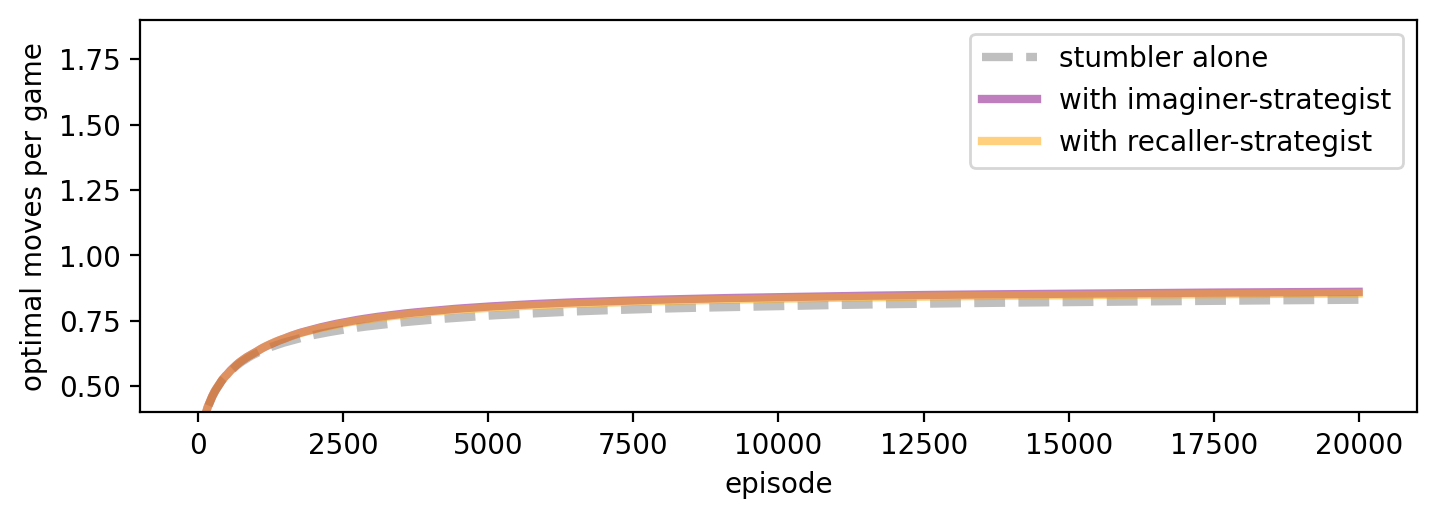

In [37]:
plt.figure(figsize=(7, 2.5))
_ = plt.plot(episode_13, exp_13_avg/episode_13, linestyle="--", color='grey', alpha=.5, linewidth=3, label="stumbler alone")
_ = plt.plot(episode_14, exp_14_avg/episode_14, color='purple', alpha=.5, linewidth=3, label="with imaginer-strategist")
_ = plt.plot(episode_14_replay, exp_14_replay_avg/episode_14_replay, color='orange', alpha=.5, linewidth=3, label="with recaller-strategist")
_ = plt.tight_layout()
_ = plt.legend()
_ = plt.xlabel("episode")
_ = plt.ylabel("optimal moves per game")
_ = plt.ylim(0.4, 1.9)


F_onewayResult(statistic=1424.9946671015073, pvalue=1.4721836583953215e-206)

img vs rep: Ttest_indResult(statistic=3.2273493424090365, pvalue=0.0013528829991437121)
img vs ctl: Ttest_indResult(statistic=72.83753995539392, pvalue=6.550217939905693e-192)
rep vs ctl: Ttest_indResult(statistic=42.561799119812946, pvalue=1.1286694876336428e-128)



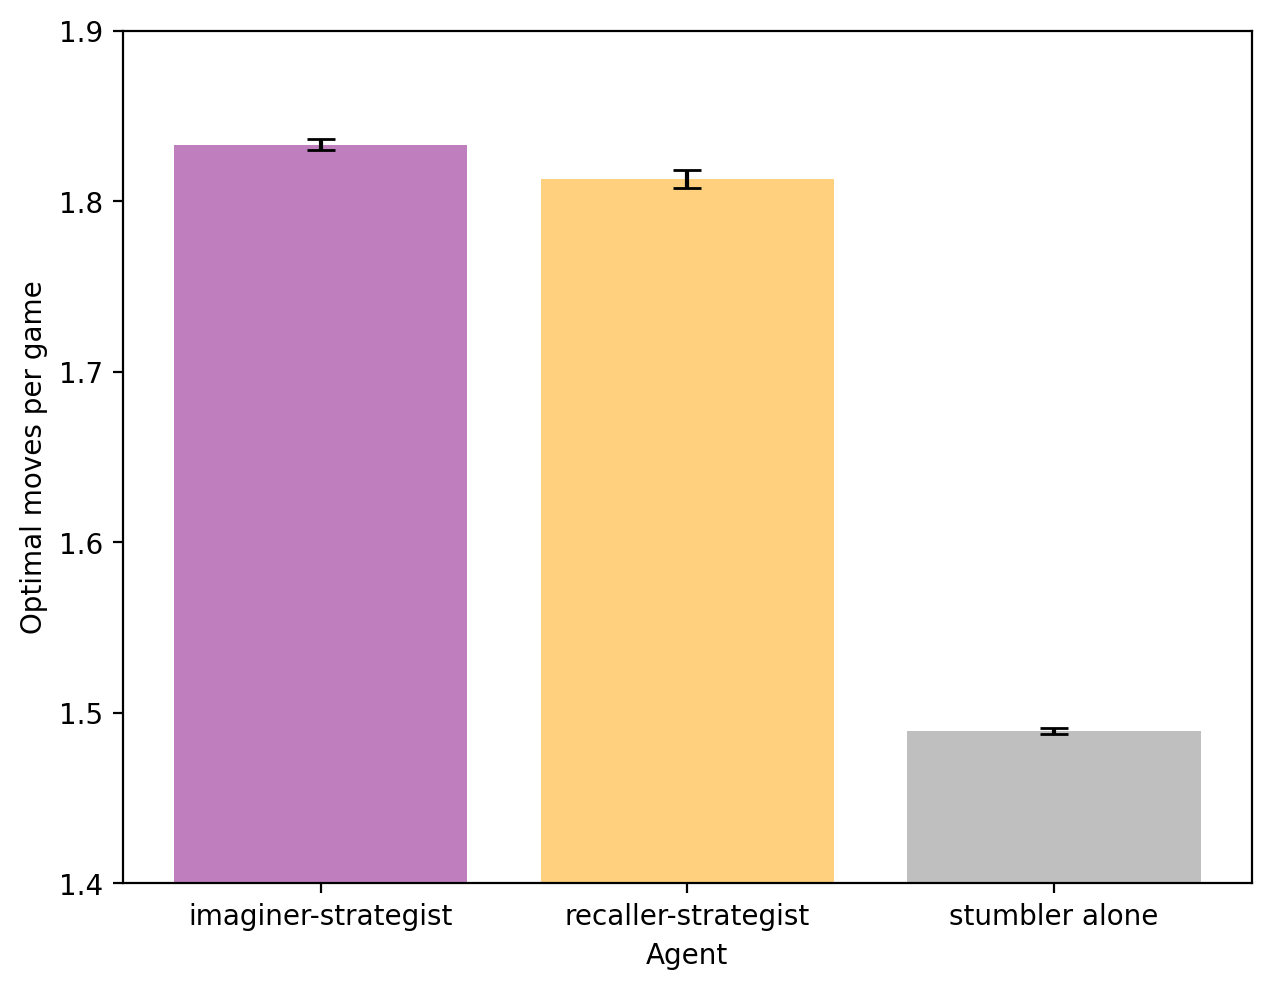

In [15]:
img = [mon['total_op_moves'][-1] for mon in exp_14]
rep = [mon['total_op_moves'][-1] for mon in exp_14_replay]
ctl = [mon['total_op_moves'][-1] for mon in exp_13]

from scipy import stats

plt.figure()

plt.bar(range(3), [exp_14_avg[-1]/episode_14[-1], exp_14_replay_avg[-1]/episode_14_replay[-1], exp_13_avg[-1]/episode_13[-1]],
             yerr=[exp_14_SE[-1]/episode_14[-1],  exp_14_replay_SE[-1]/episode_14_replay[-1],  exp_13_SE[-1]/episode_13[-1] ],
        capsize=5, color=["purple", "orange", "gray"], alpha=0.5)

_ = plt.tight_layout()
_ = plt.ylim(1.4, 1.9)
_ = plt.xlabel("Agent")
_ = plt.ylabel("optimal moves per game")
_ = plt.xticks(range(3), labels = ["imaginer-strategist", "recaller-strategist", "stumbler alone"])

print()
print(stats.f_oneway(img, rep, ctl))
print()
print('img vs rep: ' + str(stats.ttest_ind(img, rep)))
print('img vs ctl: ' + str(stats.ttest_ind(img, ctl)))
print('rep vs ctl: ' + str(stats.ttest_ind(rep, ctl)))
print()

## Total reward

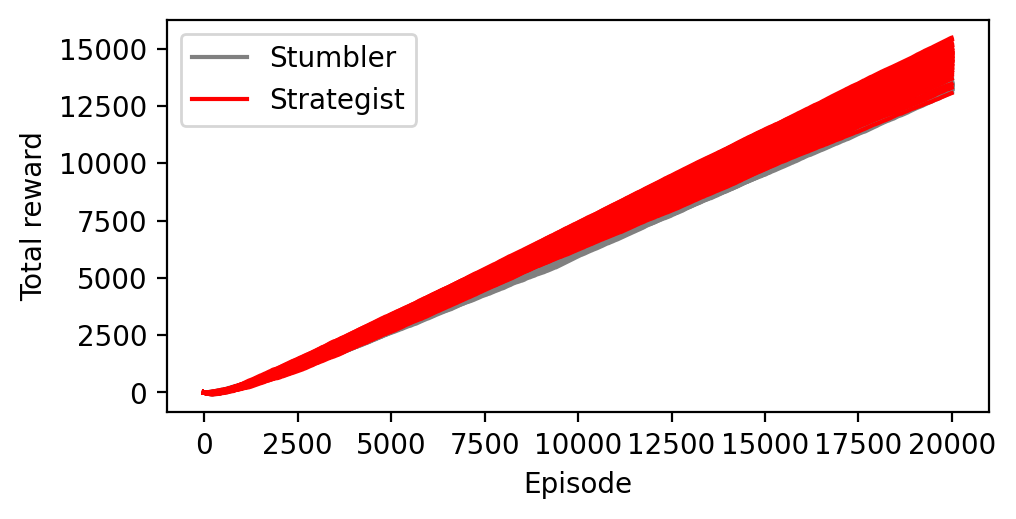

In [16]:
plt.figure(figsize=(5, 2.5))

for n, mon in enumerate(exp_13):
    # Only want one legend entry
    lab = None
    if n == 0:
        lab = "Stumbler"
        
    # Plot
    _ = plt.plot(
            mon['episode'], 
            np.asarray(mon['total_reward']),
            color='grey', alpha=1,  label=lab
    )

for n, mon in enumerate(exp_14):
    # Only want one legend entry
    lab = None
    if n == 0:
        lab = "Strategist"
    
    # Plot
    _ = plt.plot(
            mon['episode'], 
            np.asarray(mon['total_reward']),
            color='red', alpha=1, label=lab
    )

_ = plt.tight_layout()
_ = plt.legend()
_ = plt.xlabel("Episode")
_ = plt.ylabel("Total reward")

In [17]:
# def load_stumbler_data(path, index_range=(0, 20)):
#     exps = []
#     runs = range(index_range[0], index_range[1])
#     for r in runs:
#         files = sorted(glob(os.path.join(path, 
#             "run_{}_episode*_stumbler*".format(int(r)))))

#         mon = join_monitored(files, sort_key='episode')
#         exps.append(mon)
#     return exps

In [18]:
# path = "/Users/Jack/Desktop/PNC/CoAx/azad-next-move/data/wythoff/exp14/"
# exp_14 = load_stumbler_data(path, (1, 21))

# path = "/Users/Jack/Desktop/PNC/CoAx/azad-next-move/data/wythoff/exp14_replay/"
# exp_14_replay = load_stumbler_data(path, (1, 21))

# path = "/Users/Jack/Desktop/PNC/CoAx/azad-next-move/data/wythoff/exp13/"
# exp_13 = load_stumbler_data(path, (1, 21))

In [19]:
pprint(exp_13[0].keys())
pprint(exp_14[0].keys())
pprint(exp_14_replay[0].keys())
# pprint(exp_14_perfect_replay[0].keys())

dict_keys(['file', 'episode', 'loss', 'score', 'total_losses', 'total_moves', 'total_op_move_opportunities', 'total_op_moves', 'total_reward', 'total_wins'])
dict_keys(['file', 'episode', 'loss', 'score', 'total_losses', 'total_moves', 'total_op_move_opportunities', 'total_op_moves', 'total_reward', 'total_wins'])
dict_keys(['file', 'episode', 'loss', 'score', 'total_losses', 'total_moves', 'total_op_move_opportunities', 'total_op_moves', 'total_reward', 'total_wins'])


In [20]:
# print(exp_14[0]['total_wins'][475:525])
# # print(exp_14[0]['total_wins'][100])

# for i in range(len(exp_14)):
#     exp_14[i]['total_wins'] = np.array(exp_14[i]['total_wins'])
#     add = 0
#     for j in range(int(len(exp_14[i]['total_wins']) / 100)):
#         exp_14[i]['total_wins'][j * 100 : (j + 1) * 100] += add
#         add = exp_14[i]['total_wins'][((j + 1) * 100) - 1]

# print(exp_14[0]['total_wins'][475:525])
# # print(exp_14[0]['total_wins'][100])

# for i in range(len(exp_14_replay)):
#     exp_14_replay[i]['total_wins'] = np.array(exp_14_replay[i]['total_wins'])
#     add = 0
#     for j in range(int(len(exp_14_replay[i]['total_wins']) / 100)):
#         exp_14_replay[i]['total_wins'][j * 100 : (j + 1) * 100] += add
#         add = exp_14_replay[i]['total_wins'][((j + 1) * 100) - 1]

        

# plt.figure(figsize=(5, 2.5))

# # for n, mon in enumerate(exp_13):
# #     # Only want one legend entry
# #     lab = None
# #     if n == 0:
# #         lab = "Stumbler"
        
# #     # Plot
# #     _ = plt.plot(
# #             mon['episode'], 
# #             np.asarray(mon['total_wins']),
# #             color='grey', alpha=1,  label=lab
# #     )

# # for n, mon in enumerate(exp_14):
# #     # Only want one legend entry
# #     lab = None
# #     if n == 0:
# #         lab = "Strategist"
    
# #     # Plot
# #     _ = plt.plot(
# #             mon['episode'], 
# #             np.asarray(mon['total_wins']),
# #             color='red', alpha=1, label=lab
# #     )

# # _ = plt.tight_layout()
# # _ = plt.legend()
# # _ = plt.xlabel("Episode")
# # _ = plt.ylabel("Total wins")
# # _ = plt.xlim(400,600)
# # _ = plt.ylim(0,1000)

In [21]:
episode_13,        exp_13_avg,        exp_13_SE        = score_summary(exp_13,        key="total_reward")
episode_14,        exp_14_avg,        exp_14_SE        = score_summary(exp_14,        key="total_reward")
episode_14_replay, exp_14_replay_avg, exp_14_replay_SE = score_summary(exp_14_replay, key="total_reward")

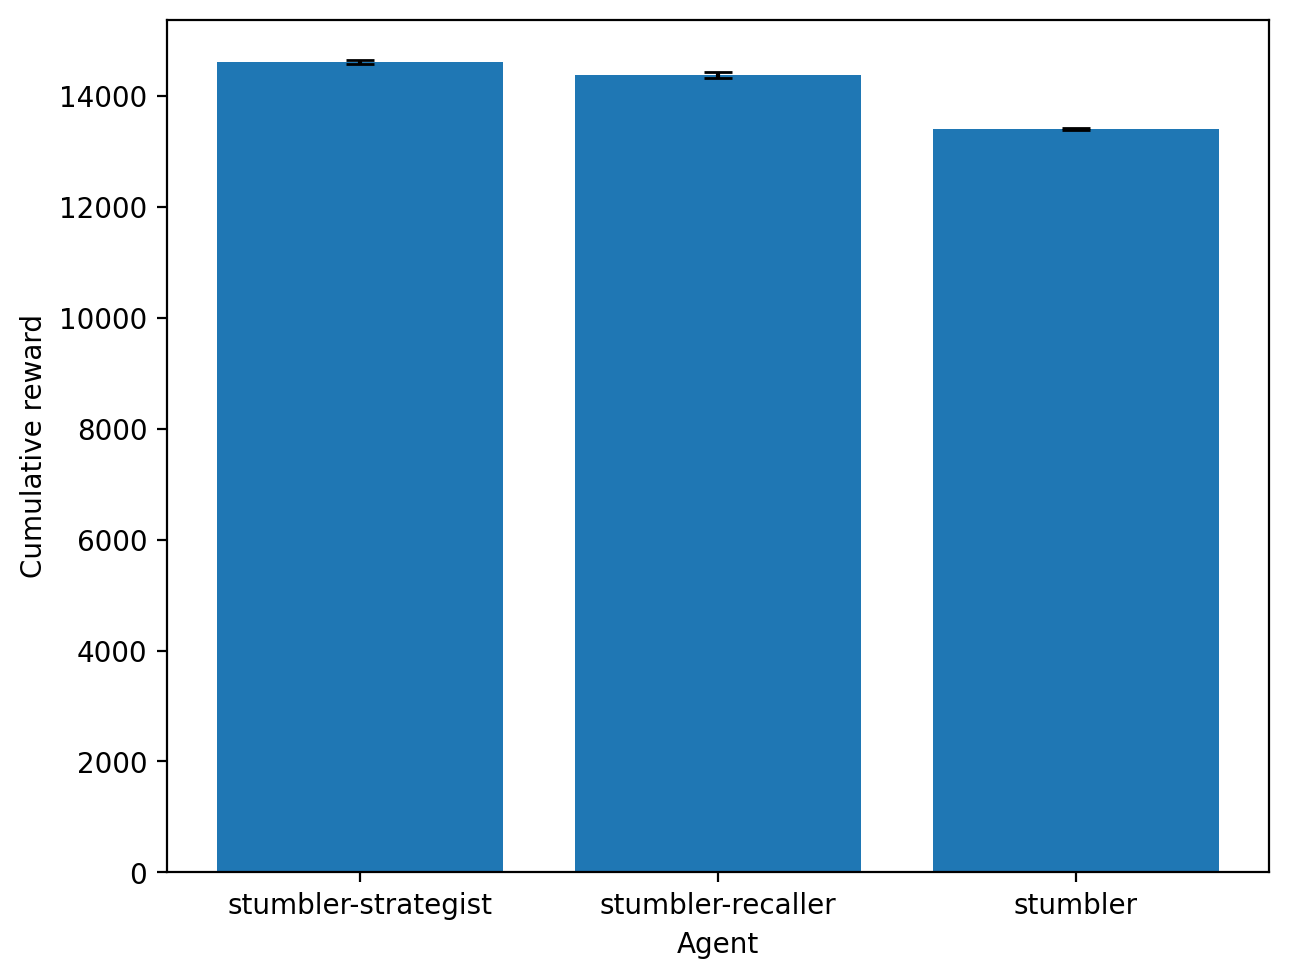

In [22]:
plt.figure()

plt.bar(range(3), [exp_14_avg[-1], exp_14_replay_avg[-1], exp_13_avg[-1]],
             yerr=[exp_14_SE[-1],  exp_14_replay_SE[-1],  exp_13_SE[-1] ], capsize=5)

_ = plt.tight_layout()
# _ = plt.ylim(0, 1)
_ = plt.xlabel("Agent")
_ = plt.ylabel("Cumulative reward")
_ = plt.xticks(range(3), labels = ["stumbler-strategist", "stumbler-recaller", "stumbler"])

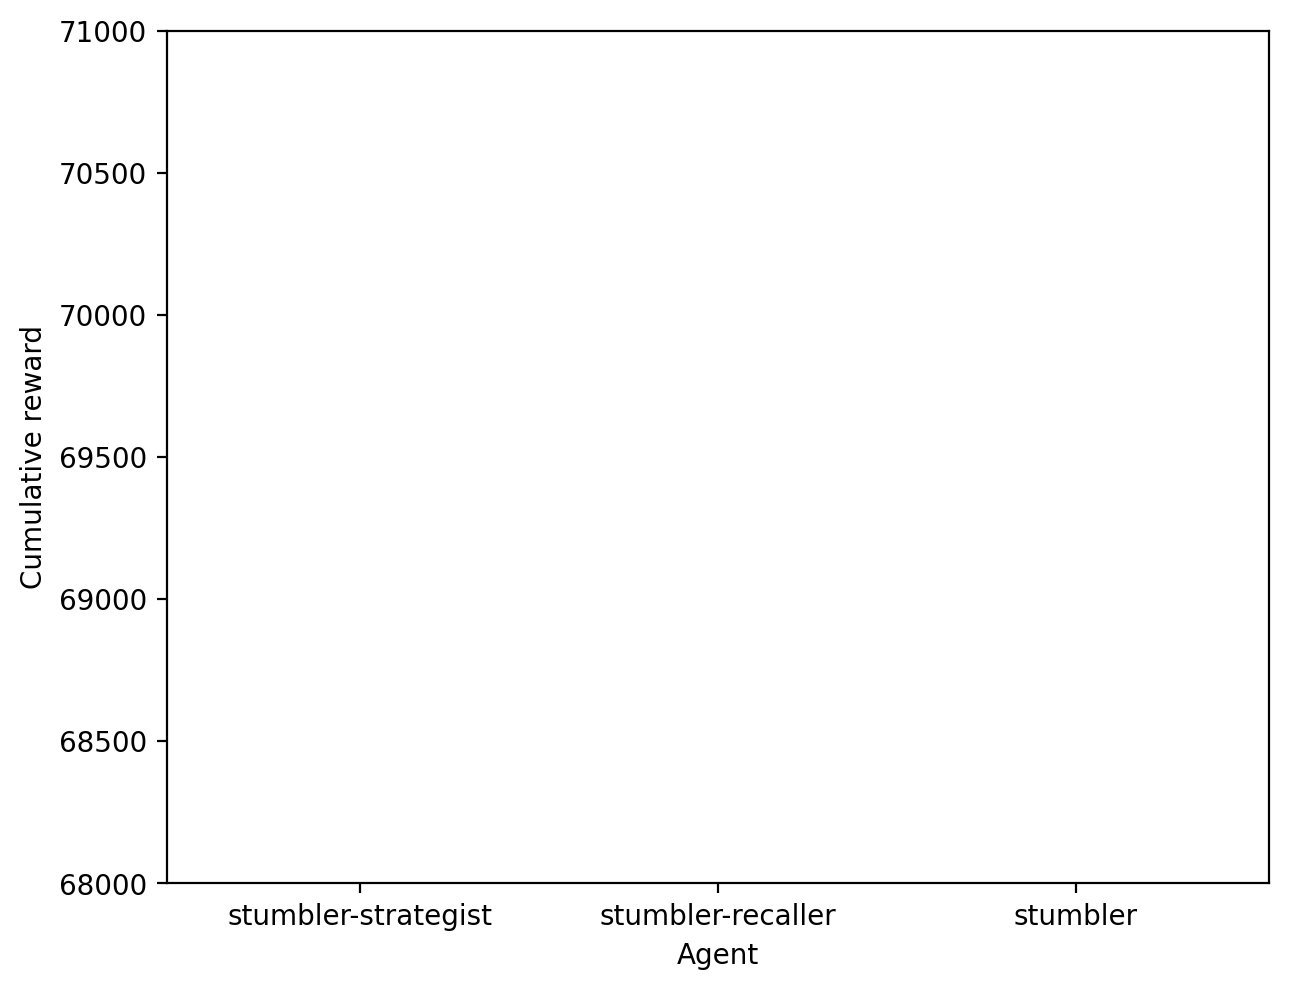

In [23]:
plt.figure()

plt.bar(range(3), [exp_14_avg[-1], exp_14_replay_avg[-1], exp_13_avg[-1]],
             yerr=[exp_14_SE[-1],  exp_14_replay_SE[-1],  exp_13_SE[-1] ], capsize=5)

_ = plt.tight_layout()
_ = plt.ylim(68000, 71000)
_ = plt.xlabel("Agent")
_ = plt.ylabel("Cumulative reward")
_ = plt.xticks(range(3), labels = ["stumbler-strategist", "stumbler-recaller", "stumbler"])

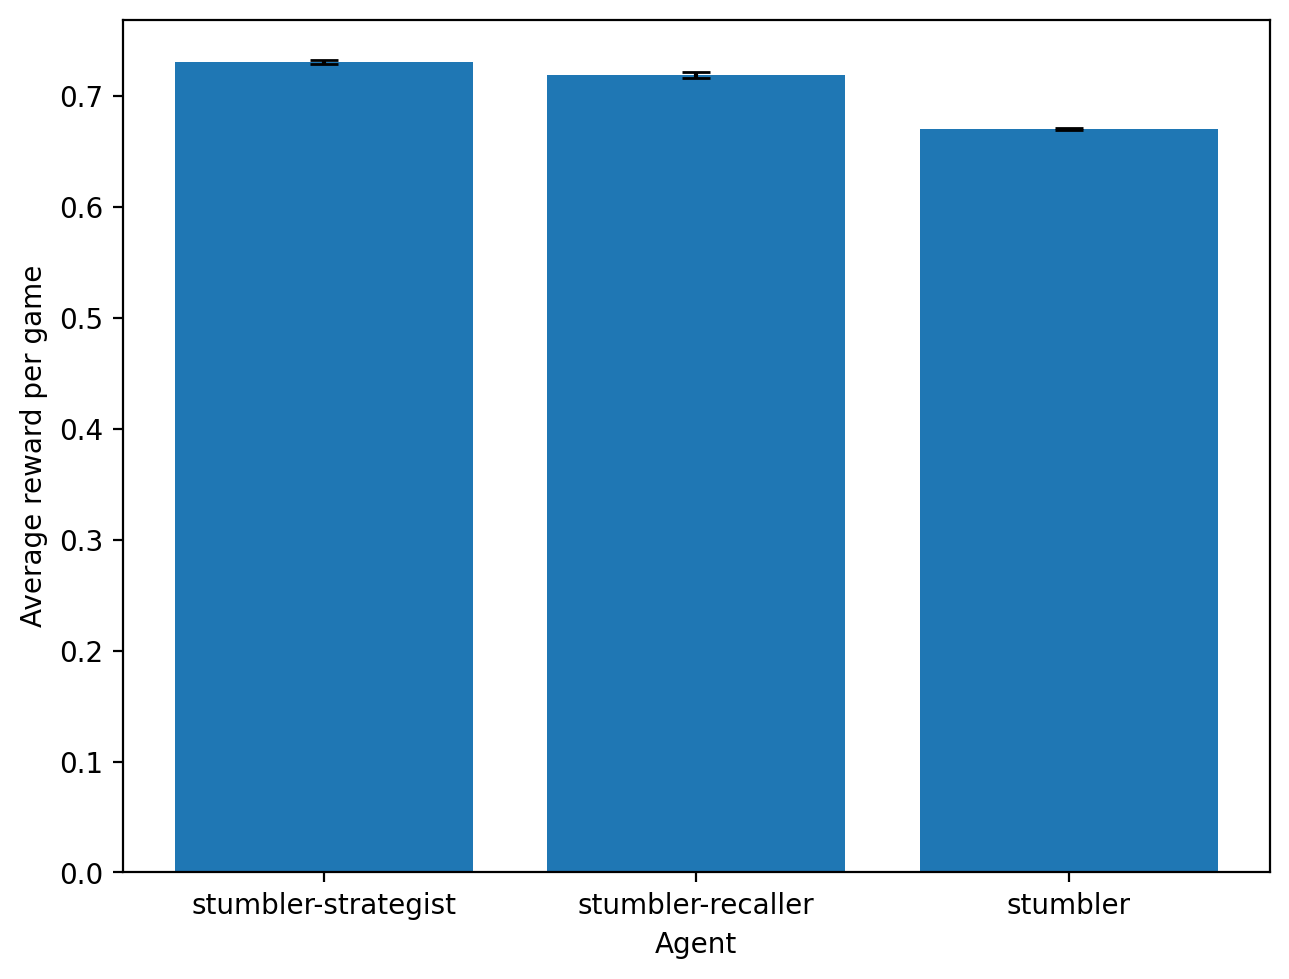

In [24]:
plt.figure()

plt.bar(range(3), [exp_14_avg[-1]        / max(episode_14),
                   exp_14_replay_avg[-1] / max(episode_14_replay),
                   exp_13_avg[-1]        / max(episode_13)],
        yerr=[exp_14_SE[-1]        / max(episode_14),
              exp_14_replay_SE[-1] / max(episode_14_replay),
              exp_13_SE[-1]        / max(episode_13)],
        capsize=5)

_ = plt.tight_layout()
# _ = plt.ylim(0, 1)
_ = plt.xlabel("Agent")
_ = plt.ylabel("Average reward per game")
_ = plt.xticks(range(3), labels = ["stumbler-strategist", "stumbler-recaller", "stumbler"])

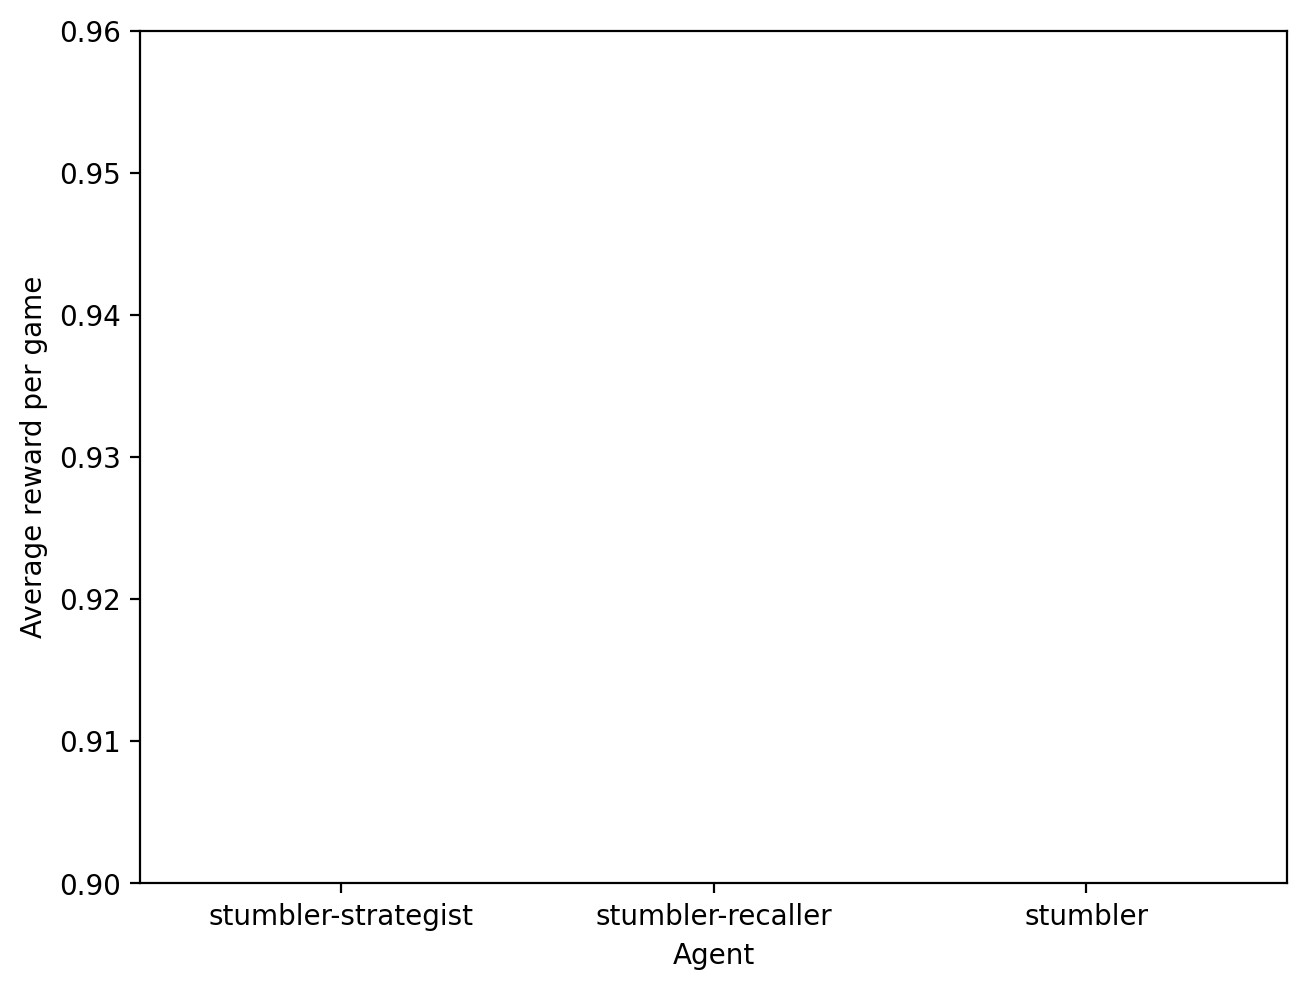

In [25]:
plt.figure()

plt.bar(range(3), [exp_14_avg[-1]        / max(episode_14),
                   exp_14_replay_avg[-1] / max(episode_14_replay),
                   exp_13_avg[-1]        / max(episode_13)],
        yerr=[exp_14_SE[-1]        / max(episode_14),
              exp_14_replay_SE[-1] / max(episode_14_replay),
              exp_13_SE[-1]        / max(episode_13)],
        capsize=5)

_ = plt.tight_layout()
_ = plt.ylim(0.9, 0.96)
_ = plt.xlabel("Agent")
_ = plt.ylabel("Average reward per game")
_ = plt.xticks(range(3), labels = ["stumbler-strategist", "stumbler-recaller", "stumbler"])

In [26]:
episode_13,        exp_13_avg,        exp_13_SE        = score_summary(exp_13,        key="total_wins")
episode_14,        exp_14_avg,        exp_14_SE        = score_summary(exp_14,        key="total_wins")
episode_14_replay, exp_14_replay_avg, exp_14_replay_SE = score_summary(exp_14_replay, key="total_wins")
# episode_14_perfect_replay, exp_14_perfect_replay_avg, exp_14_perfect_replay_SE = score_summary(exp_14_perfect_replay, key="total_wins")

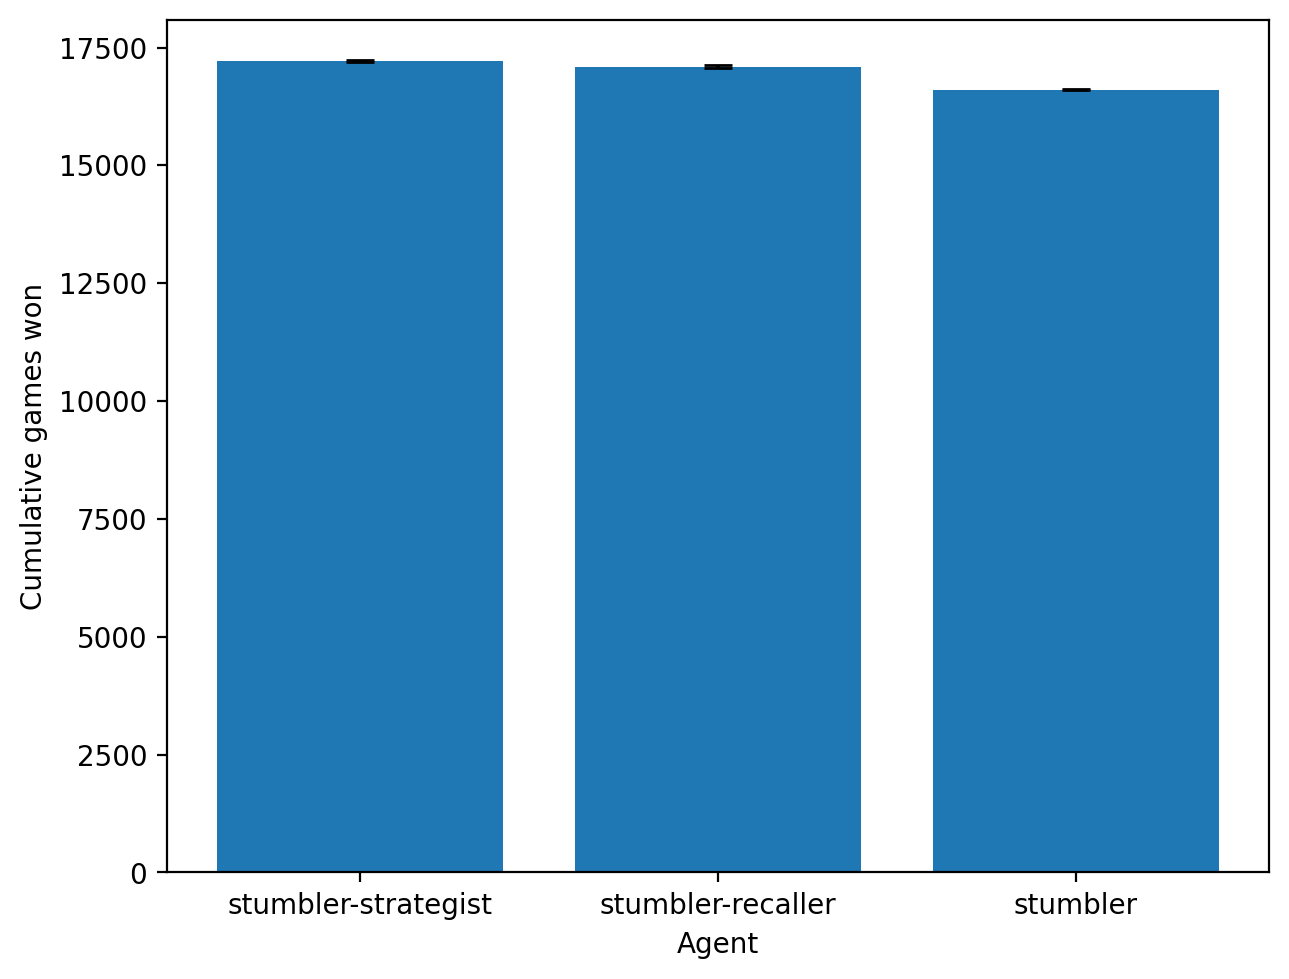

In [27]:
plt.figure()

plt.bar(range(3), [exp_14_avg[-1], exp_14_replay_avg[-1], exp_13_avg[-1]],
             yerr=[exp_14_SE[-1],  exp_14_replay_SE[-1],  exp_13_SE[-1] ], capsize=5)

_ = plt.tight_layout()
# _ = plt.ylim(0, 1)
_ = plt.xlabel("Agent")
_ = plt.ylabel("Cumulative games won")
_ = plt.xticks(range(3), labels = ["stumbler-strategist", "stumbler-recaller", "stumbler"])

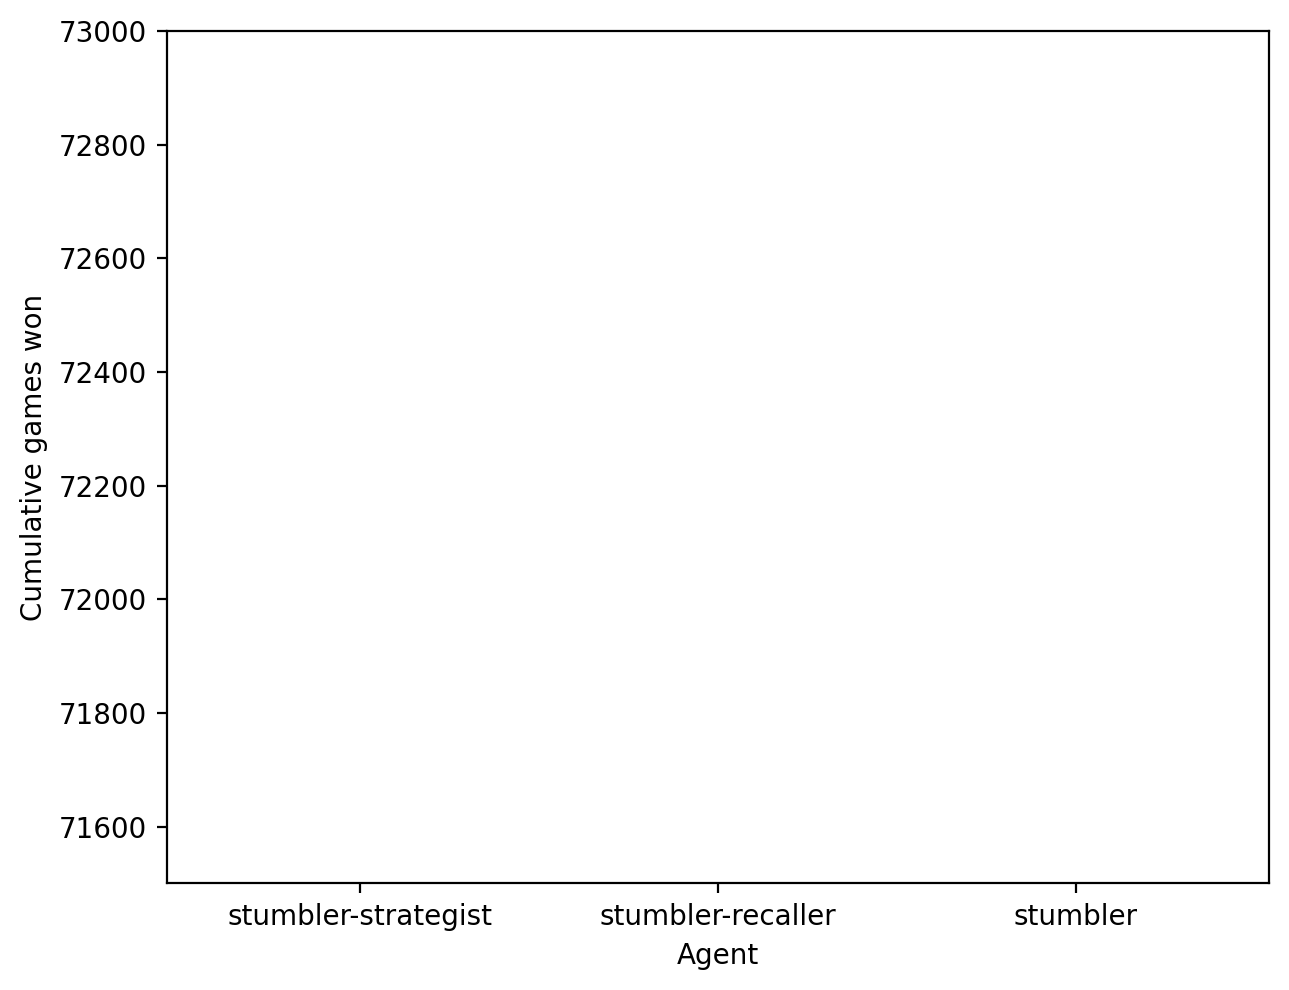

In [28]:
plt.figure()

plt.bar(range(3), [exp_14_avg[-1], exp_14_replay_avg[-1], exp_13_avg[-1]],
             yerr=[exp_14_SE[-1],  exp_14_replay_SE[-1],  exp_13_SE[-1] ], capsize=5)

_ = plt.tight_layout()
_ = plt.ylim(71500, 73000)
_ = plt.xlabel("Agent")
_ = plt.ylabel("Cumulative games won")
_ = plt.xticks(range(3), labels = ["stumbler-strategist", "stumbler-recaller", "stumbler"])

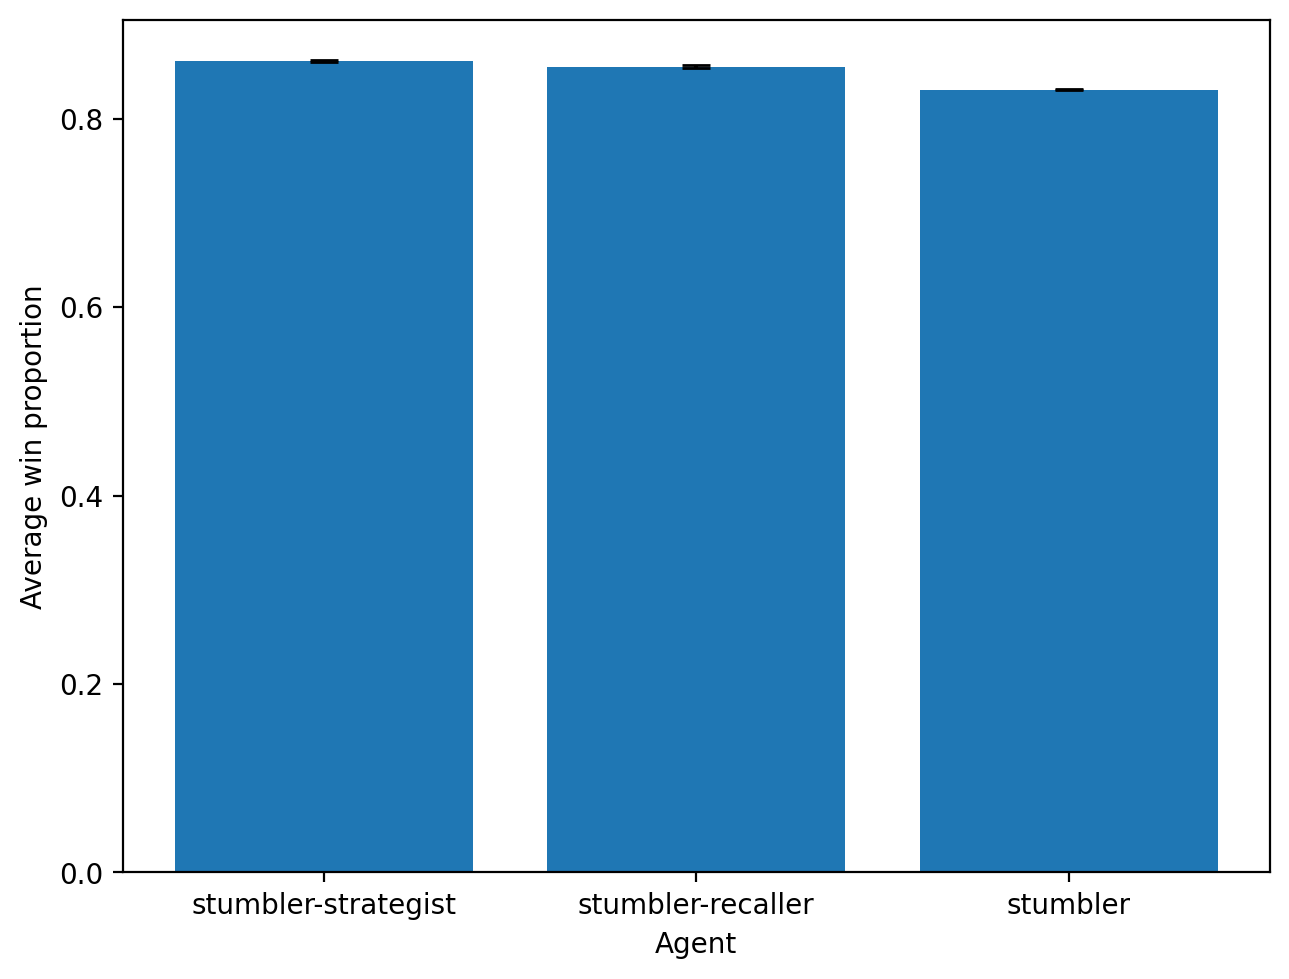

In [29]:
plt.figure()

plt.bar(range(3), [exp_14_avg[-1]        / max(episode_14),
                   exp_14_replay_avg[-1] / max(episode_14_replay),
                   exp_13_avg[-1]        / max(episode_13)],
             yerr=[exp_14_SE[-1]        / max(episode_14),
                   exp_14_replay_SE[-1] / max(episode_14_replay),
                   exp_13_SE[-1]        / max(episode_13)],
        capsize=5)

_ = plt.tight_layout()
# _ = plt.ylim(0, 1)
_ = plt.xlabel("Agent")
_ = plt.ylabel("Average win proportion")
_ = plt.xticks(range(3), labels = ["stumbler-strategist", "stumbler-recaller", "stumbler"])


F_onewayResult(statistic=166.66908547765254, pvalue=4.0709366061877548e-56)

img vs rep: Ttest_indResult(statistic=3.896545448720669, pvalue=0.00011445149799083472)
img vs ctl: Ttest_indResult(statistic=30.23179720033654, pvalue=8.783398197572398e-93)
rep vs ctl: Ttest_indResult(statistic=12.479803230875106, pvalue=4.8654865156732294e-29)



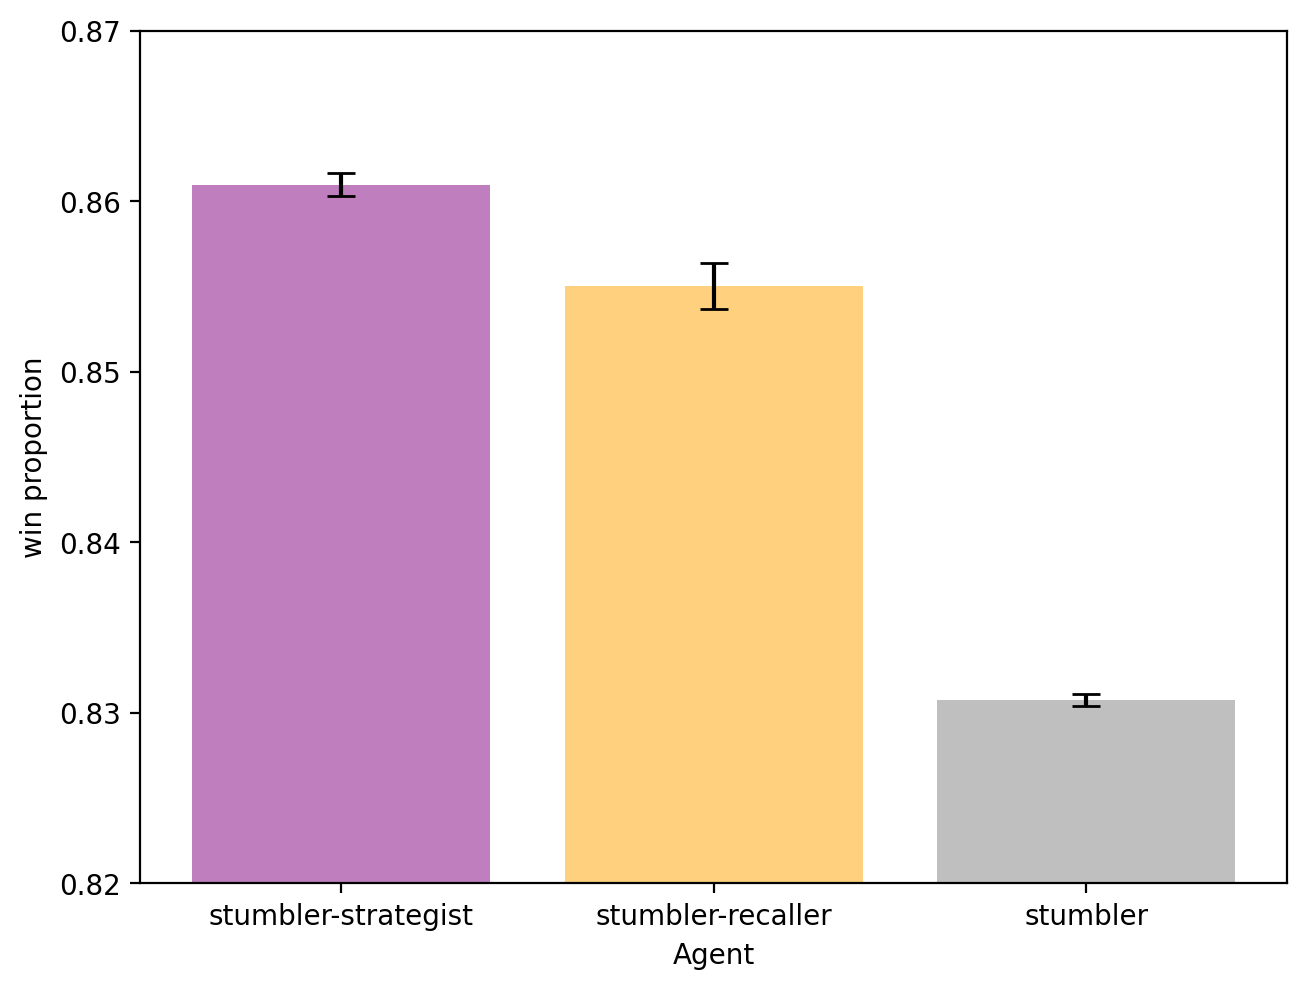

In [34]:
img = [mon['total_wins'][-1] for mon in exp_14]
rep = [mon['total_wins'][-1] for mon in exp_14_replay]
ctl = [mon['total_wins'][-1] for mon in exp_13]

plt.figure()

plt.bar(range(3), [exp_14_avg[-1]        / max(episode_14),
                   exp_14_replay_avg[-1] / max(episode_14_replay),
                   exp_13_avg[-1]        / max(episode_13)],
             yerr=[exp_14_SE[-1]        / max(episode_14),
                   exp_14_replay_SE[-1] / max(episode_14_replay),
                   exp_13_SE[-1]        / max(episode_13)],
        color = ["purple", "orange", "gray"],
        alpha = 0.5,
        capsize=5)

_ = plt.tight_layout()
_ = plt.ylim(0.82, 0.87)
_ = plt.xlabel("Agent")
_ = plt.ylabel("win proportion")
_ = plt.xticks(range(3), labels = ["stumbler-strategist", "stumbler-recaller", "stumbler"])

print()
print(stats.f_oneway(img, rep, ctl))
print()
print('img vs rep: ' + str(stats.ttest_ind(img, rep)))
print('img vs ctl: ' + str(stats.ttest_ind(img, ctl)))
print('rep vs ctl: ' + str(stats.ttest_ind(rep, ctl)))
print()

/var/folders/kg/g1dd54k55952tgw_kmcj8wqr0000gn/T/ipykernel_22442/3044204037.py:2: RuntimeWarning: divide by zero encountered in divide
  _ = plt.plot(episode_13, exp_13_avg / episode_13, linestyle="--", color='grey', alpha=.5, linewidth=3, label="Stumbler alone")
/var/folders/kg/g1dd54k55952tgw_kmcj8wqr0000gn/T/ipykernel_22442/3044204037.py:3: RuntimeWarning: divide by zero encountered in divide
  _ = plt.plot(episode_14, exp_14_avg / episode_14, color='purple', alpha=.5, linewidth=3, label="with Strategist and imagination")
/var/folders/kg/g1dd54k55952tgw_kmcj8wqr0000gn/T/ipykernel_22442/3044204037.py:4: RuntimeWarning: divide by zero encountered in divide
  _ = plt.plot(episode_14_replay, exp_14_replay_avg / episode_14_replay, color='orange', alpha=.5, linewidth=3, label="with Strategist and replay")


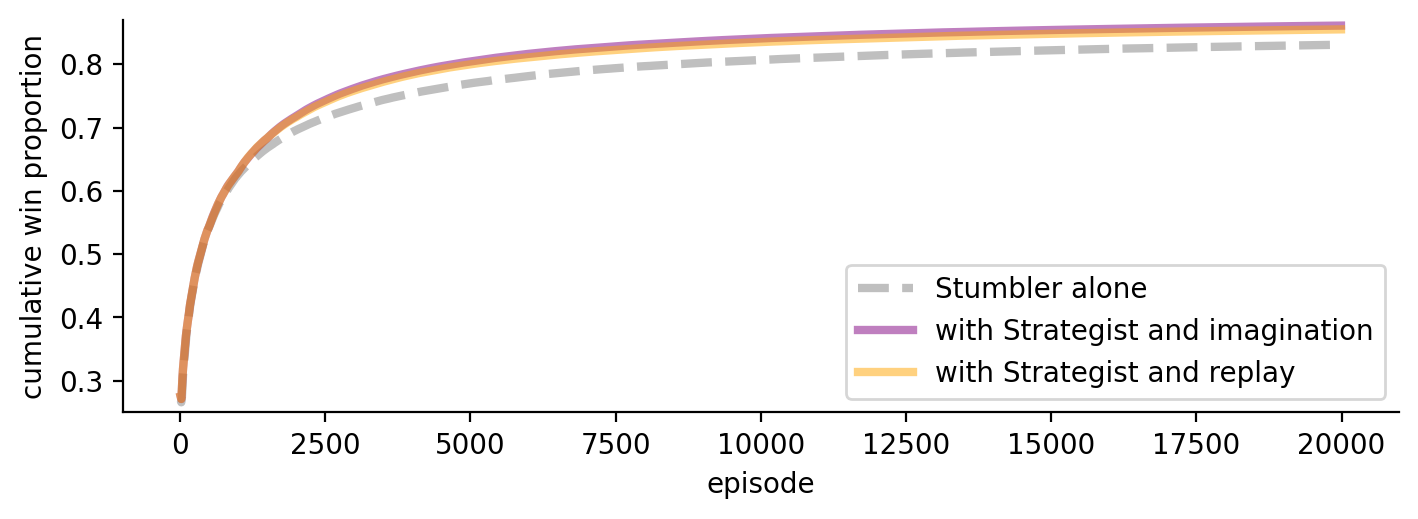

In [45]:
plt.figure(figsize=(7, 2.5))
_ = plt.plot(episode_13, exp_13_avg / episode_13, linestyle="--", color='grey', alpha=.5, linewidth=3, label="Stumbler alone")
_ = plt.plot(episode_14, exp_14_avg / episode_14, color='purple', alpha=.5, linewidth=3, label="with Strategist and imagination")
_ = plt.plot(episode_14_replay, exp_14_replay_avg / episode_14_replay, color='orange', alpha=.5, linewidth=3, label="with Strategist and replay")
_ = plt.tight_layout()
_ = plt.legend()
_ = plt.xlabel("episode")
_ = plt.ylabel("cumulative win proportion")
_ = plt.ylim(0.25, 0.87)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

In [32]:
plt.figure()

plt.bar(range(4), [exp_14_avg[-1]        / max(episode_14),
                   exp_14_perfect_replay_avg[-1] / max(episode_14_perfect_replay),
                   exp_14_replay_avg[-1] / max(episode_14_replay),
                   exp_13_avg[-1]        / max(episode_13)],
             yerr=[exp_14_SE[-1]        / max(episode_14),
                   exp_14_perfect_replay_SE[-1] / max(episode_14_perfect_replay),
                   exp_14_replay_SE[-1] / max(episode_14_replay),
                   exp_13_SE[-1]        / max(episode_13)],
        capsize=5)

_ = plt.tight_layout()
_ = plt.ylim(0.94, 0.97)
_ = plt.xlabel("Agent")
_ = plt.ylabel("Average win proportion")
_ = plt.xticks(range(4), labels = ["strategist", "perfect recaller", "recaller", "stumbler"])

NameError: name 'exp_14_perfect_replay_avg' is not defined

<Figure size 640x480 with 0 Axes>

In [ ]:
path = "/Users/Jack/Desktop/PNC/CoAx/azad-next-move/data/wythoff/exp14/"

exp_14 = []
runs = range(1, 21)
for r in runs:
    files = sorted(glob(os.path.join(path, 
        "run_{}_episode*_strategist*.csv".format(int(r)))))
    
    mon = join_monitored(files, sort_key='episode')
    exp_14.append(mon)

In [ ]:
pprint(exp_14[0].keys())

In [ ]:
plt.figure(figsize=(5, 2.5))

for n, mon in enumerate(exp_14):
    # Only want one legend entry
    lab = None
    if n == 0:
        lab = "Strategist"
    
    # Plot
    _ = plt.plot(mon['episode'], mon['mae_euclid'], 
                    color='red', alpha=.1, label=lab)

_ = plt.tight_layout()
_ = plt.legend()
_ = plt.xlabel("Episode")
_ = plt.ylabel("mae_euclid")

In [ ]:
episode_14_euc, exp_14_avg_euc, _ = score_summary(exp_14, key='mae_euclid')

In [ ]:
plt.figure(figsize=(7, 2.5))
_ = plt.plot(episode_14_euc, exp_14_avg_euc, color='red', alpha=.5, linewidth=3, label="Strategist")
_ = plt.tight_layout()
_ = plt.legend()
_ = plt.xlabel("Episode")
_ = plt.ylabel("mae_euclid")

In [ ]:
plt.figure(figsize=(5, 2.5))

for n, mon in enumerate(exp_14):
    # Only want one legend entry
    lab = None
    if n == 0:
        lab = "Strategist"
    
    # Plot
    _ = plt.plot(mon['episode'], mon['mae'], 
                    color='red', alpha=.1, label=lab)

_ = plt.tight_layout()
_ = plt.legend()
_ = plt.xlabel("Episode")
_ = plt.ylabel("mae")

In [ ]:
episode_14, exp_14_avg, _ = score_summary(exp_14, key='mae')

In [ ]:
plt.figure(figsize=(7, 2.5))
_ = plt.plot(episode_14, exp_14_avg, color='red', alpha=.5, linewidth=3, label="Strategist")
_ = plt.tight_layout()
_ = plt.legend()
_ = plt.xlabel("Episode")
_ = plt.ylabel("mae")

In [ ]:
plt.figure(figsize=(7, 2.5))

_ = plt.plot(episode_14_euc, exp_14_avg_euc, color='green', alpha=.5, linewidth=3, label="mae_euclid")
_ = plt.tight_layout()
_ = plt.legend()
_ = plt.xlabel("Episode")
# _ = plt.ylabel("mae_euclid")

_ = plt.plot(episode_14, exp_14_avg, color='purple', alpha=.5, linewidth=3, label="mae_wythoff's")
_ = plt.tight_layout()
_ = plt.legend()
_ = plt.xlabel("Episode")
_ = plt.ylabel("mae")

In [ ]:
max(episode_14)